In [1]:
cd "/Users/TaihuaLi/Desktop/Projects/Netflix Prize/"

/Users/TaihuaLi/Desktop/Projects/Netflix Prize


In [2]:
import numpy as np
import pandas as pd

In [3]:
ratings = pd.read_csv("Rating Zeros.csv", index_col=0) # row: users  col: movies
items = pd.read_csv("items.csv", index_col=0) # movies information
genre = pd.read_csv("genre.csv") # movie genre information

In [4]:
ratings.head(3)

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
items.head(3)

,Name,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantacy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
﻿Movie.ID,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
genre.head(3)

,﻿Genre,ID
0,unknown,0
1,Action,1
2,Adventure,2


### K-means Clustering: Users

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=5)

In [9]:
kmeans.fit(ratings,)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [10]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [11]:
pd.set_option('display.max_rows', ratings.describe().shape[1])
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.519789,0.023747,0.013193,0.052770,0.105541,0.068602,0.467018,0.197889,0.612137,0.158311,...,2.341877e-17,-1.214306e-17,2.341877e-17,-6.071532e-18,2.341877e-17,2.638522e-03,7.915567e-03,5.277045e-03,2.341877e-17,2.341877e-17
1,2.963415,0.018293,0.457317,0.134146,0.109756,0.109756,2.402439,0.146341,1.658537,0.408537,...,-5.204170e-18,-1.040834e-17,1.829268e-02,1.219512e-02,-5.204170e-18,-2.602085e-18,-5.204170e-18,-5.204170e-18,-5.204170e-18,-5.204170e-18
2,2.492537,0.805970,0.552239,2.567164,0.402985,0.492537,2.776119,2.835821,2.626866,1.582090,...,-3.469447e-18,5.970149e-02,-3.469447e-18,-3.469447e-18,-3.469447e-18,-1.734723e-18,-3.469447e-18,-3.469447e-18,-3.469447e-18,-3.469447e-18
3,3.663265,2.204082,1.071429,2.663265,1.387755,0.051020,3.173469,2.265306,2.163265,0.571429,...,-5.637851e-18,-8.673617e-18,-5.637851e-18,-4.336809e-18,-5.637851e-18,-2.168404e-18,-5.637851e-18,-4.336809e-18,3.061224e-02,3.061224e-02
4,2.314894,0.587234,0.217021,1.136170,0.268085,0.046809,1.791489,1.548936,1.161702,0.221277,...,1.276596e-02,-1.127570e-17,9.974660e-18,-5.637851e-18,1.276596e-02,-2.818926e-18,9.974660e-18,-5.637851e-18,9.974660e-18,9.974660e-18


In [12]:
movie_names = items.Name

In [13]:
genre_types = items.columns[1:]

In [14]:
items_array = np.array(items)
movie_genre = np.array(items[genre_types])

In [15]:
items_array

array([['Toy Story (1995)', 0, 0, ..., 0, 0, 0],
       ['GoldenEye (1995)', 0, 1, ..., 1, 0, 0],
       ['Four Rooms (1995)', 0, 0, ..., 1, 0, 0],
       ..., 
       ['Sliding Doors (1998)', 0, 0, ..., 0, 0, 0],
       ['You So Crazy (1994)', 0, 0, ..., 0, 0, 0],
       ['Scream of Stone (Schrei aus Stein) (1991)', 0, 0, ..., 0, 0, 0]], dtype=object)

##### Cluster Definition

In [16]:
def FiveStarMovies(centroids, labels, k, NTerms):
    five_star_movies = []
    cluster_movies = []
    for i in range(k):
        cluster_members = ratings[labels==i]
        print 'cluster',i+1,'size: ', cluster_members.shape[0]
        movie_total_rating = np.array(cluster_members.sum(0)).astype(float)
        movie_rating_count = np.array((cluster_members!=0).sum(0)).astype(float)
        movie_average_rating = np.divide(movie_total_rating, movie_rating_count)
        movie_average_rating[np.isnan(movie_average_rating)] = 0
        rated_movie_list = sorted(zip(movie_names, movie_average_rating), key=lambda x: int(x[1]), reverse=True)
        to_append = []
        cluster_append = []
        for j in rated_movie_list:
            if j[1] == 5:
                to_append.append(j[0]) 
            if j[1] != 0:
                cluster_append.append(j[0])
        five_star_movies.append(to_append)
        cluster_movies.append(cluster_append)
    print "\n"
    # most rated movies in each cluster
    k = 0
    for m in five_star_movies:
        prototype = list(np.zeros(len(genre_types)))
        for n in items_array:    
            for i in m:
                if i == n[0]:
                    prototype += n[1:]
        print "Representative Movies:"
        for i in range(5):
            print m[i]
        print "\n"
        prototype = map(int, prototype)
        movie_genre_to_use = sorted(zip(genre_types, prototype), key=lambda x:int(x[1]), reverse=True)
        print "Cluster", k+1, "top genre: "
        for i in movie_genre_to_use[:NTerms]:
            print i[0]
        print "\n"
        k += 1
    return five_star_movies, cluster_movies

In [17]:
five_star_movies, cluster_movies = FiveStarMovies(centroids, labels, 5, 5)

cluster 1 size:  379
cluster 2 size:  164
cluster 3 size:  67
cluster 4 size:  98
cluster 5 size:  235


Representative Movies:
Four Rooms (1995)
Faster Pussycat! Kill! Kill! (1965)
Aristocats, The (1970)
Homeward Bound: The Incredible Journey (1993)
Paradise Lost: The Child Murders at Robin Hood Hills (1996


Cluster 1 top genre: 
Drama
Comedy
Children
Adventure
Romance


Representative Movies:
Dolores Claiborne (1994)
Three Colors: Red (1994)
So I Married an Axe Murderer (1993)
Dances with Wolves (1990)
D3: The Mighty Ducks (1996)


Cluster 2 top genre: 
Drama
Comedy
Romance
Adventure
Thriller


Representative Movies:
Baby-Sitters Club, The (1995)
Timecop (1994)
Great Day in Harlem, A (1994)
Two or Three Things I Know About Her (1966)
Hearts and Minds (1996)


Cluster 3 top genre: 
Drama
Comedy
Action
Animation
Documentary


Representative Movies:
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
Horseman on the Roof, The (Hussard sur le toit, Le) (1995)
Maya Lin: A Strong Clear V

In [18]:
labels = kmeans.labels_; labels[0:5]

array([3, 1, 0, 0, 4], dtype=int32)

### KNN: Using Cluster Labels

In [19]:
from sklearn.cross_validation import train_test_split
r_train, r_test, target_train, target_test = train_test_split(ratings, labels, test_size=0.2, random_state=33)

print r_train.shape, r_test.shape
print r_test[0:5]

(754, 1682) (189, 1682)
     1  2  3  4  5  6  7  8  9  10  ...   1673  1674  1675  1676  1677  1678  \
462  0  0  0  0  0  0  0  0  0   0  ...      0     0     0     0     0     0   
301  4  2  2  4  0  0  4  4  3   0  ...      0     0     0     0     0     0   
235  4  0  0  0  0  0  4  0  0   0  ...      0     0     0     0     0     0   
691  5  0  0  0  0  0  0  2  0   0  ...      0     0     0     0     0     0   
176  0  0  0  0  0  0  5  0  0   0  ...      0     0     0     0     0     0   

     1679  1680  1681  1682  
462     0     0     0     0  
301     0     0     0     0  
235     0     0     0     0  
691     0     0     0     0  
176     0     0     0     0  

[5 rows x 1682 columns]


In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(r_train)
train_norm = min_max_scaler.fit_transform(r_train)
test_norm = min_max_scaler.fit_transform(r_test)

In [21]:
def KNN_Classifier(instance, dat, label, k, measure):
    if measure == "euclidean":
        dists = np.sqrt(((dat-instance)**2).sum(axis=1))
    elif measure == "cosine":
        dat_norm = np.array([np.linalg.norm(dat[j]) for j in range(len(dat))])
        instance_norm = np.linalg.norm(instance)
        sims = np.dot(dat, instance)/(dat_norm*instance_norm)
        dists = 1 - sims
    idx = np.argsort(dists)
    neighbor_index = idx[:k]
    neighbor_record = dat[[neighbor_index]]
    labels = label[[neighbor_index]]
    final_class = np.bincount(labels)
    return np.argmax(final_class), idx[:k]

In [22]:
def Comp_Accuracy(testdata, testlabel, traindata, trainlabel, k, measure):
    correct = 0
    for i in range(testdata.shape[0]):
        pred_class = KNN_Classifier(testdata[i], traindata, trainlabel, k, measure)
        if pred_class[0] == testlabel[i]:
            correct += 1
    accuracy_rate = float(correct)/float(testdata.shape[0])
    return accuracy_rate

In [23]:
Comp_Accuracy(test_norm, target_test, train_norm, target_train, 5, "euclidean")

0.544973544973545

In [24]:
euc_accuracy = []
for i in range(1, 21):
    result = Comp_Accuracy(test_norm, target_test, train_norm, target_train, i, "euclidean")
    euc_accuracy.append(result)
print euc_accuracy

[0.6031746031746031, 0.5291005291005291, 0.5714285714285714, 0.5132275132275133, 0.544973544973545, 0.5026455026455027, 0.5396825396825397, 0.48677248677248675, 0.5238095238095238, 0.4973544973544973, 0.5185185185185185, 0.47619047619047616, 0.49206349206349204, 0.48148148148148145, 0.49206349206349204, 0.4656084656084656, 0.455026455026455, 0.4444444444444444, 0.4444444444444444, 0.43386243386243384]


In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

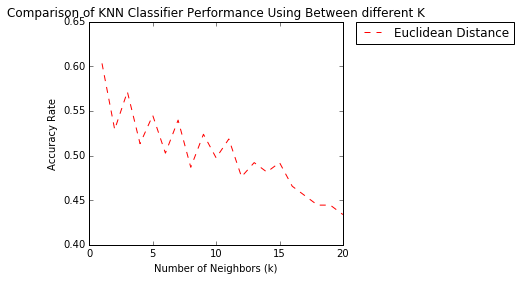

In [26]:
k = np.array(range(1, 21))
euc = np.array(euc_accuracy)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Comparison of KNN Classifier Performance Using Between different K")
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('Accuracy Rate')
plt.plot(k, euc, 'r--', label='Euclidean Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As shown above, when k=1, the KNN classifier achieves the max accuracy.

In [51]:
def getmovies(instance, dat, label, movies, n=5, k=1, measure="euclidean"):
    assigned_class = KNN_Classifier(instance, dat, label, k, measure)
    print "You might also like:"
    for i in range(n):
        print movies[int(assigned_class[0])][i]

Recommend top 5 movies based on its cluster assignment. There is no rating prediction involved.

In [52]:
getmovies(test_norm[0], train_norm, target_train, five_star_movies)

You might also like:
Four Rooms (1995)
Faster Pussycat! Kill! Kill! (1965)
Aristocats, The (1970)
Homeward Bound: The Incredible Journey (1993)
Paradise Lost: The Child Murders at Robin Hood Hills (1996


As shown above, KNN with clustering labels is not a recommendation that is as elegant and personalized as other approaches such as collaborative filtering. Therefore, this method is not preferred.